# Generare le istanze

Prima assicurati di avere tutti i pachetti necessari installati. Se non hai installato i pacchetti, esegui il comando seguente: 
```bash
pip3 install -r requirements.txt
```

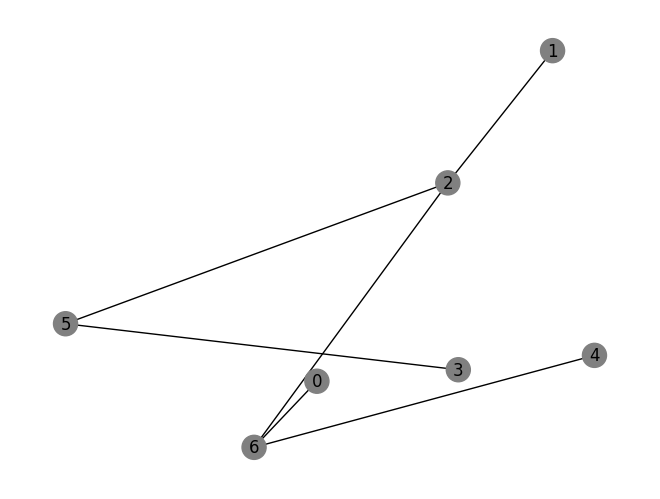

Number of edges:  6
Weight of the edges of the tree:  {(0, 6): 25.942243542145693, (1, 2): 50.15974481593781, (2, 5): 87.92041856133307, (2, 6): 99.16148445843275, (3, 5): 76.68767828015137, (4, 6): 72.44998274671983}
Number of nodes:  7
Number of flows:  3
Flows with their source and destination: [[0, 2], [4, 5], [5, 0]]


In [1]:
import networkx as nx
import utility_functions as uf

# CREATING A TREE NETWORK AND SAVING IT TO A .gml FILE

T = uf.generate_random_network_tree(7, 3, 150)
flows = uf.get_random_flows(T, 3)
uf.draw_tree(T)

nx.write_gml(T, "tree_net/tree.gml")

print("Number of edges: ", T.number_of_edges())
print("Weight of the edges of the tree: ", uf.get_weight_of_edges(T))
print("Number of nodes: ", T.number_of_nodes())
print("Number of flows: ", T.graph['K'])
print("Flows with their source and destination:", flows)

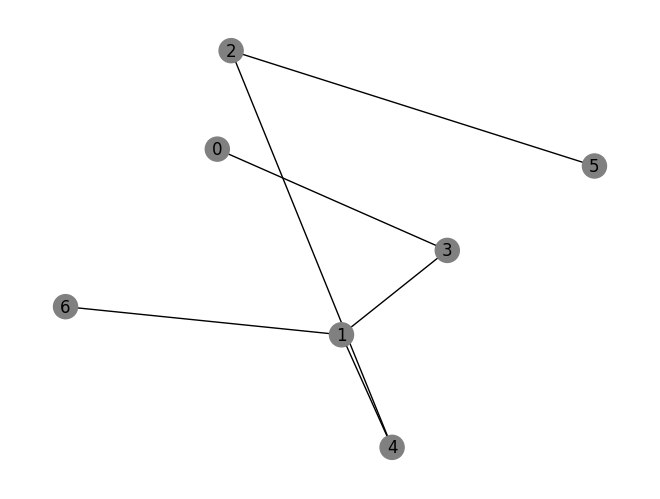

In [3]:
# READING THE TREE NETWORK FROM THE .gml FILE 

T = nx.read_gml("tree_net/tree.gml")
uf.draw_tree(T)

# Prima greedy naive

1. Iniziamo con un insieme vuoto di stazioni di ricarica.
2. Per ogni flusso da origine a destinazione, seguiamo il percorso dell'albero. Partiamo con una carica completa (cioè, l'autonomia è L).
3. Mentre percorriamo il percorso, diminuiamo l'autonomia del veicolo della lunghezza dell'arco corrente.
4. Quando per giungere al nodo successivo l'autonomia non è più sufficiente, posizioniamo una colonnina di ricarica sul nodo corrente. Aggiungiamo questo nodo all'insieme delle stazioni di ricarica.
5. Ripetiamo i passaggi 3-4 fino a quando tutti i veicoli hanno raggiunto le loro destinazioni.

Questa euristica cerca di minimizzare il numero di stazioni di ricarica posizionando ogni stazione il più lontano possibile lungo ogni percorso, dato che ogni veicolo parte con la carica completa e ogni stazione di ricarica ricarica completamente la batteria del veicolo.

charging_stations: {'2', '4'}
all paths:  [['4', '2'], ['6', '1', '4', '2'], ['5', '2', '4', '1', '3', '0']] 



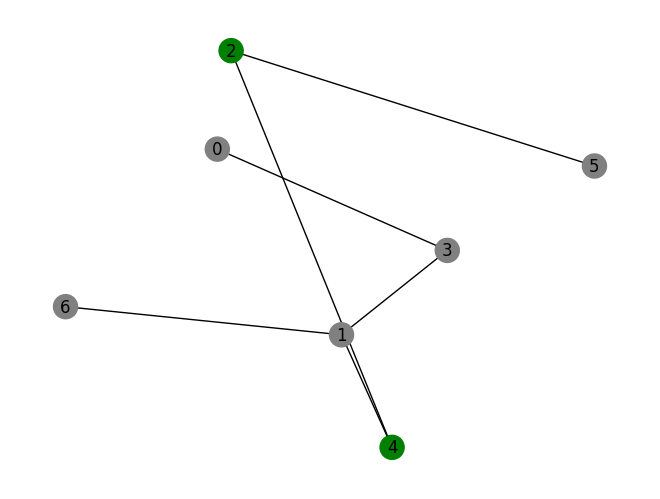

In [5]:
import networkx as nx
import utility_functions as uf
# READING THE TREE NETWORK FROM THE .gml FILE 
K = 3   # the number of flows
L = 150 # the battery capacity of the electric vehicle

T = nx.read_gml("tree_net/tree.gml")
flows = uf.get_random_flows(T, K)

def greedy_electric_charging(Tree: nx.Graph, flows: list, L: int):
    charging_stations = set()
    paths = uf.get_all_paths_of_all_flows(Tree, flows)
    for path in paths:
        charge = L
        for i in range(len(path) - 1):
            charge -= Tree.edges[(path[i], path[i+1])]['weight']
            if charge < 0:
                charging_stations.add(path[i])
                charge = L
    return charging_stations

charging_stations = greedy_electric_charging(T, flows, L)
print("charging_stations:", charging_stations)

print("all paths: ", uf.get_all_paths_of_all_flows(T, flows), "\n")

uf.set_chrg_stations(T, charging_stations)
uf.draw_tree(T)

# Seconda greedy naive
1. Iniziamo con un insieme di stazioni di ricarica riempito randomicamente da una funzione.
2. Per ogni flusso da origine a destinazione, seguiamo il percorso dell'albero. Partiamo con una carica completa (cioè, l'autonomia è L).
3. Controlliamo se la rete con le stazioni di ricarica è ammissibile e cioè se ogni veicolo riesce a raggiungere la sua destinazione utilizzando le stazioni di ricarica lungo il loro percorsi.
4. Ripetiamo il punto 3 per ogni flusso da origine a destinazione.
5. Se la rete è ammissibile, allora abbiamo trovato una soluzione. Altrimenti, rimuoviamo una stazione di ricarica randomicamente e ripartiamo dal punto 3.

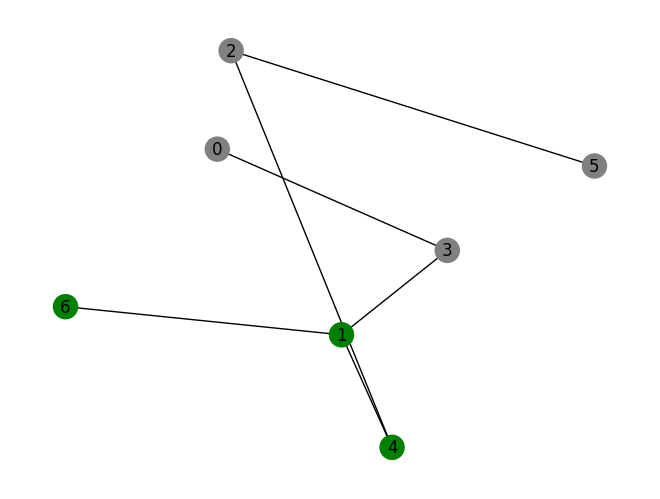

Admissible charching stations: ['2', '3', '5']


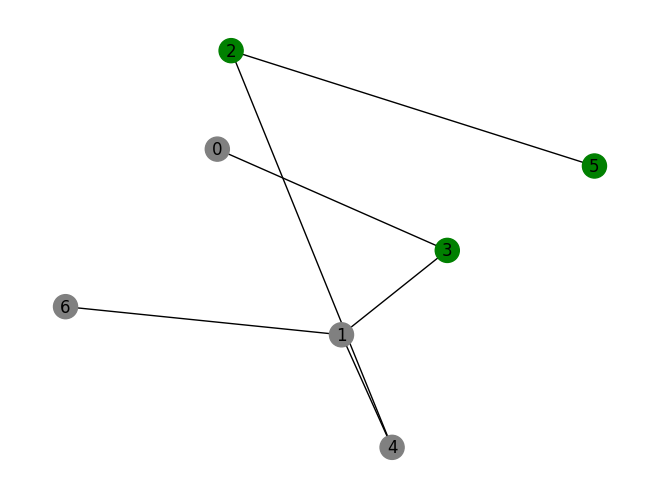

In [1]:
import networkx as nx
import utility_functions as uf
# READING THE TREE NETWORK FROM THE .gml FILE 
K = 3   # the number of flows
L = 150 # the battery capacity of the electric vehicle

T = nx.read_gml("tree_net/tree.gml")
flows = uf.get_random_flows(T, K)
uf.get_random_chrg_stations(T)
uf.draw_tree(T)
while True:
    T = nx.read_gml("tree_net/tree.gml")
    charging_stations = uf.get_random_chrg_stations(T)
    if uf.is_admissible(T, flows, L):
        print("Admissible charching stations:", charging_stations)
        break
    else:
        pass


uf.draw_tree(T)